In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [15]:
data = pd.read_csv('/content/train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)


In [16]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n] / 255


In [17]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255
_, m_train = X_train.shape

In [18]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [19]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z), axis=0, keepdims=True)

# Forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Derivatives
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

# Backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

# Update parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

# Predictions and accuracy
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# Gradient descent
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 10 == 0:
            print("Iteration:", i)
            predictions = get_predictions(A2)
            print("Accuracy:", get_accuracy(predictions, Y))

    return W1, b1, W2, b2

In [28]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration: 0
[5 5 9 ... 9 9 5] [0 9 9 ... 1 1 4]
Accuracy: 0.11214634146341464
Iteration: 10
[2 9 7 ... 7 7 7] [0 9 9 ... 1 1 4]
Accuracy: 0.18758536585365854
Iteration: 20
[2 9 7 ... 7 7 4] [0 9 9 ... 1 1 4]
Accuracy: 0.2530487804878049
Iteration: 30
[0 9 7 ... 7 7 4] [0 9 9 ... 1 1 4]
Accuracy: 0.30529268292682926
Iteration: 40
[0 8 7 ... 7 7 4] [0 9 9 ... 1 1 4]
Accuracy: 0.35573170731707315
Iteration: 50
[0 8 7 ... 1 1 4] [0 9 9 ... 1 1 4]
Accuracy: 0.41153658536585364
Iteration: 60
[5 8 7 ... 1 1 4] [0 9 9 ... 1 1 4]
Accuracy: 0.47073170731707314
Iteration: 70
[5 8 7 ... 1 1 4] [0 9 9 ... 1 1 4]
Accuracy: 0.5168780487804878
Iteration: 80
[5 8 7 ... 1 1 4] [0 9 9 ... 1 1 4]
Accuracy: 0.5535609756097561
Iteration: 90
[5 8 7 ... 1 1 9] [0 9 9 ... 1 1 4]
Accuracy: 0.5853658536585366
Iteration: 100
[5 9 1 ... 1 1 9] [0 9 9 ... 1 1 4]
Accuracy: 0.6151219512195122
Iteration: 110
[5 9 1 ... 1 1 9] [0 9 9 ... 1 1 4]
Accuracy: 0.6395121951219512
Iteration: 120
[5 9 1 ... 1 1 9] [0 9 9 ... 1

In [26]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    # Select the specific image and label
    current_image = X_train[:, index, None]  # Shape (784, 1)
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_train[index]

    print("Prediction:", prediction)
    print("Label:", label)

    # Reshape and display the image
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction: [0]
Label: 0


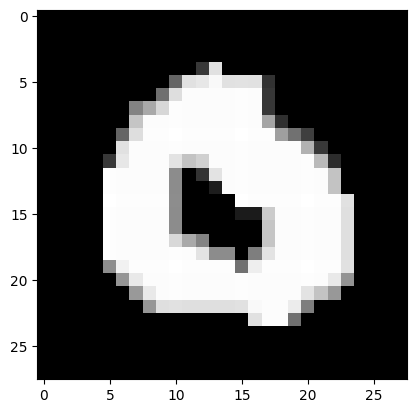

In [30]:
test_prediction(0, W1, b1, W2, b2)

Prediction: [6]
Label: 6


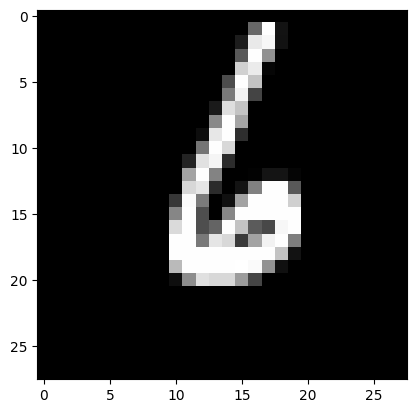

Prediction: [8]
Label: 8


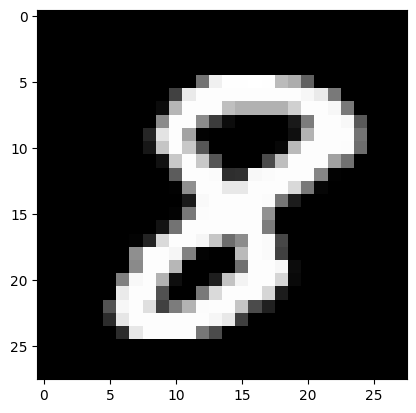

Prediction: [4]
Label: 4


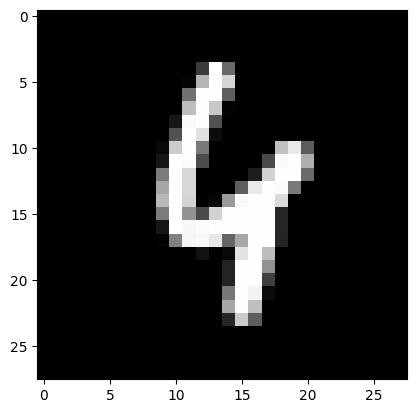

Prediction: [0]
Label: 0


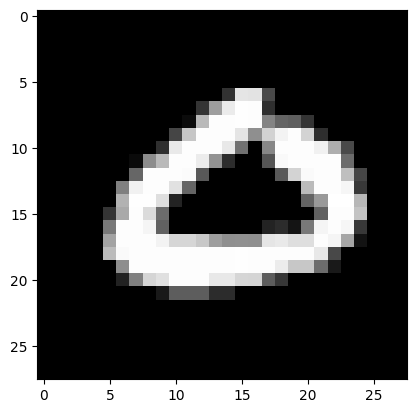

In [31]:
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)